In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [15]:
estadao_url = "../base_aplicacao_resultado/rotulado_tratado_links_estadao_resgatados.csv"

In [16]:
estadao = pd.read_csv(estadao_url, index_col = [0])
print("Quantidade dados Estadão: ", estadao.shape)

Quantidade dados Estadão:  (2398, 6)


# ANÁLISE DE CLASSIFICAÇÃO ENTRE AS OPINIÕES DO ESTADÃO

In [17]:
estadao.loc[(estadao.links.str.contains("/opiniao.estadao.")) & ~(estadao.links.str.contains("cartas") | estadao.links.str.contains("forum-dos-leitores")), "opiniao"] = "sim"
estadao.opiniao.fillna("nao", inplace = True)

In [18]:
print("Quantidad de opinião Estadão\n")
estadao.opiniao.value_counts()

Quantidad de opinião Estadão



nao    2314
sim      84
Name: opiniao, dtype: int64

In [19]:
estadao["metaforico"] = estadao.metaforico_pred.map({1: "sim", 0:"nao"}) 

In [20]:
grp_metaforico_carta = estadao.groupby(["metaforico", "opiniao"], as_index = False).size().rename(columns = {"size": "quantidade_cartas"})
grp_metaforico = estadao.groupby("metaforico", as_index = False).size().rename(columns = {"size": "quantidade_metaforico"})
grp2 = grp_metaforico_carta.merge(grp_metaforico, on = "metaforico", how = "left")
grp2["percentual"] = (grp2["quantidade_cartas"] / grp2["quantidade_metaforico"]) * 100
grp2

,metaforico,opiniao,quantidade_cartas,quantidade_metaforico,percentual
0,nao,nao,1347,1364,98.753666
1,nao,sim,17,1364,1.246334
2,sim,nao,967,1034,93.520309
3,sim,sim,67,1034,6.479691


### O que quer dizer? 
- Do que foi classificado como metafórico, 6% são originalmente textos de opinião;

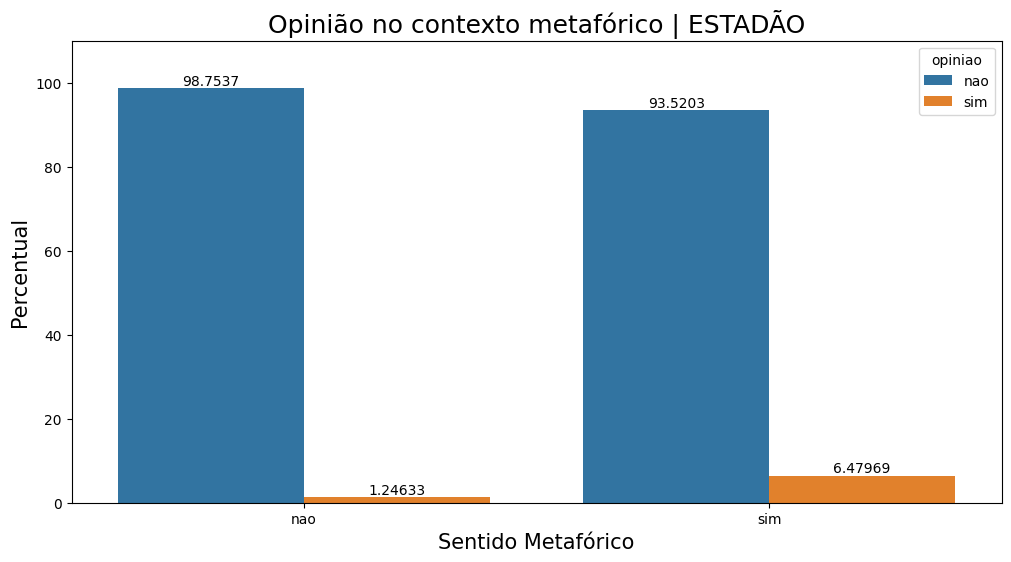

In [21]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = "metaforico", y = "percentual", hue = "opiniao", data = grp2)
ax.set_xlabel("Sentido Metafórico", fontsize = 15)
ax.set_ylabel("Percentual", fontsize = 15)
ax.set_title("Opinião no contexto metafórico | ESTADÃO", fontsize = 18)
ax.set_ylim(0, 110)
for i in ax.containers:
    ax.bar_label(i,)
ax = ax 

In [22]:
grp_carta_metaforico = estadao.groupby(["opiniao", "metaforico"], as_index = False).size().rename(columns = {"size": "quantidade_metaforicos"})
grp_carta = estadao.groupby("opiniao", as_index = False).size().rename(columns = {"size": "quantidade_opinioes"})
grp22 = grp_carta_metaforico.merge(grp_carta, on = "opiniao", how = "left")
grp22["percentual"] = (grp22["quantidade_metaforicos"] / grp22["quantidade_opinioes"]) * 100
grp22


,opiniao,metaforico,quantidade_metaforicos,quantidade_opinioes,percentual
0,nao,nao,1347,2314,58.210890
1,nao,sim,967,2314,41.789110
2,sim,nao,17,84,20.238095
3,sim,sim,67,84,79.761905


### O que quer dize?
- Das opinões encontradas, 79% foi calsssificado com uso no sentido metafórico;
- Do que não é carta ou opinião, 41% foi classificado como metafórico;

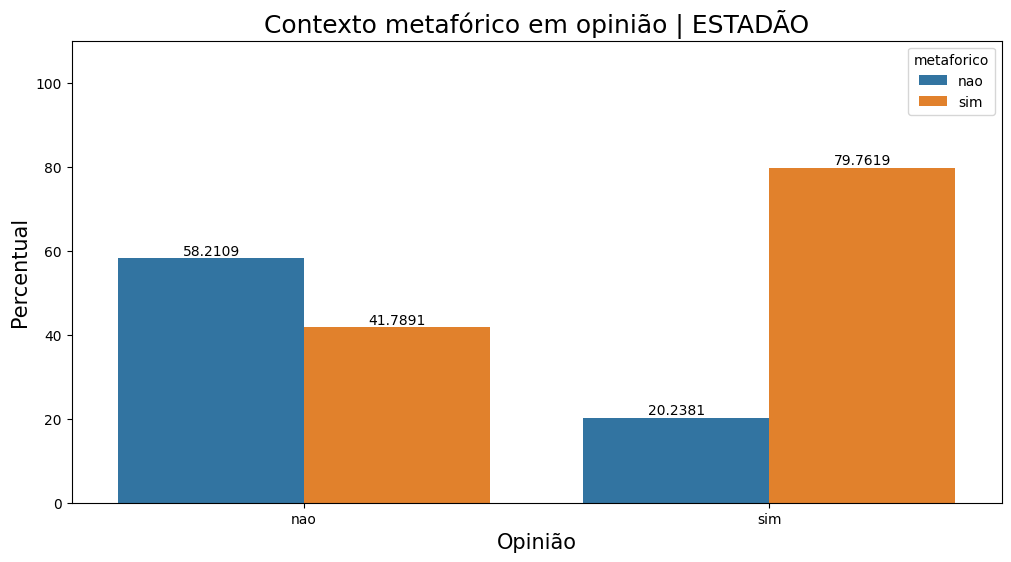

In [23]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = "opiniao", y = "percentual", hue = "metaforico", data = grp22)
ax.set_xlabel("Opinião", fontsize = 15)
ax.set_ylabel("Percentual", fontsize = 15)
ax.set_title("Contexto metafórico em opinião | ESTADÃO", fontsize = 18)
ax.set_ylim(0, 110)
for i in ax.containers:
    ax.bar_label(i,)
ax = ax 

## Análise de proporcionalidade 

In [24]:
grp_carta_metaforico

,opiniao,metaforico,quantidade_metaforicos
0,nao,nao,1347
1,nao,sim,967
2,sim,nao,17
3,sim,sim,67


## O que significa: 
- Dentre os textos de opinião, os texto classficados como não-metafórico estão na proporção de 1:3.9. Ou seja, a cada uma carta classificada como não-metafórico, temos 3.94 classficadas como metafórico
- Dentre os textos comuns, os textos calssificados como não-metafóricos estão na proporção de 1:0.71. Ou seja, a cada um carta classificada como não-metafórico, temos 0.71 sendo classificadas como metafóricos

In [25]:
!jupyter nbconvert --to html --no-input analise_opiniao_estadao.ipynb

[NbConvertApp] Converting notebook analise_opiniao_estadao.ipynb to html
[NbConvertApp] Writing 667363 bytes to analise_opiniao_estadao.html


In [26]:
# folha.to_excel("base_aplicacao_resultado/folha_cartas_identificadas.xlsx", index = False)
# estadao.to_excel("base_aplicacao_resultado/estadao_cartas_identificadas.xlsx", index = False)